## Data Fetching and Transformation

In this first part of the notebook I am loading in the relevant data and do some light data transformation.


In [86]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import fetch_data as fd
import geopandas as gpd
import os

from fetch_data import fetch_traffic_data
from fetch_data import get_city_info

fetch_traffic_data()
get_city_info()

Already have 2016.csv, skipping...
Already have 2017.csv, skipping...
Already have 2018.csv, skipping...
Already have 2019.csv, skipping...
Already have 2020.csv, skipping...
Already have 2021.csv, skipping...
Already have 2022.csv, skipping...
Already have 2023.csv, skipping...
Already have 2024.csv, skipping...


,regional key,city,sq km,population
0,11000000,Berlin,891.12,3685265
1,02000000,Hamburg,755.09,1862565
2,09162000,München,310.70,1505005
3,05315000,Köln,405.02,1024621
4,06412000,Frankfurt am Main,248.31,756021
...,...,...,...,...
2054,16075127,Ziegenrück,8.25,626
2055,16071061,Neumark,8.67,462
2056,16069052,Ummerstadt,15.73,455
2057,03354021,Schnackenburg,23.70,447


In [87]:
import pandas as pd
import os

df_States = pd.read_csv(
    "/Users/gazizajanabayeva/Documents/Data-analytics/urban-mobility-risk-analysis/src/ULAND_Inhabitants.csv",
    sep=";"
)

df_States["ULAND"] = df_States["ULAND"].astype(str)
df_States["ULAND"] = df_States["ULAND"].str.zfill(2)
df_States.head()

,ULAND,STATE,INHABITANTS
0,08,Baden-W��rtte,11280257
1,09,Bayern,13369393
2,11,Berlin,3755251
3,12,Brandenburg,2573135
4,04,Bremen,684864


In [88]:
YEARS = [2020, 2021, 2022, 2023, 2024]
df_dict = fd.get_dfs(YEARS)
df = pd.concat(df_dict.values())
city_info = fd.get_city_info()
df.describe()

,OID_,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,USTRZUSTAND
count,1.270879e+06,1.270879e+06,1.270879e+06,1.270879e+06,1.270879e+06,1.270879e+06,1.270879e+06,1.270879e+06,1.270879e+06,1.270879e+06,1.270879e+06,1.270879e+06,1.270879e+06,1.270879e+06,1.270879e+06,1.270879e+06,1.270879e+06,1.270879e+06,1.270879e+06,1.270879e+06
mean,1.274542e+05,2.022072e+03,6.778170e+00,1.337666e+01,4.099360e+00,2.807335e+00,3.811547e+00,3.817489e+00,4.290212e-01,3.236170e-01,7.480964e-01,8.778098e-02,1.348948e-01,4.522539e-02,1.194811e-01,5.509531e+05,5.638129e+06,9.727546e+00,5.087237e+01,2.769013e-01
std,7.400137e+04,1.410206e+00,3.182283e+00,4.776863e+00,1.874859e+00,4.177423e-01,2.665562e+00,2.173839e+00,7.875111e-01,4.678560e-01,4.341064e-01,2.829762e-01,3.416113e-01,2.077982e-01,3.243539e-01,1.510304e+05,1.986031e+05,2.159932e+00,1.782456e+00,4.903760e-01
min,1.000000e+00,2.020000e+03,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.806992e+05,5.240628e+06,5.871498e+00,4.731220e+01,0.000000e+00
25%,6.354450e+04,2.021000e+03,4.000000e+00,1.000000e+01,3.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.273710e+05,5.471360e+06,7.962487e+00,4.938352e+01,0.000000e+00
50%,1.270880e+05,2.022000e+03,7.000000e+00,1.400000e+01,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.343950e+05,5.660288e+06,9.491759e+00,5.104081e+01,0.000000e+00
75%,1.906320e+05,2.023000e+03,9.000000e+00,1.700000e+01,6.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.772297e+05,5.794630e+06,1.144511e+01,5.228769e+01,1.000000e+00
max,2.690480e+05,2.024000e+03,1.200000e+01,2.300000e+01,7.000000e+00,3.000000e+00,9.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.204055e+05,6.100725e+06,1.502839e+01,5.505184e+01,2.000000e+00


In [89]:
# Accident severity encoding
df = pd.get_dummies(df, columns=["UKATEGORIE"], prefix="inj", dtype=int)
df.rename(
    columns={
        "inj_3": "inj_light",
        "inj_2": "inj_serious",
        "inj_1": "inj_fatal",
    },
    inplace=True,
)

# Light conditions encoding
df = pd.get_dummies(df, columns=["ULICHTVERH"], prefix="lum", dtype=int)
df.rename(
    columns={
        "lum_0": "daylight",
        "lum_1": "twilight",
        "lum_2": "darkness",
    },
    inplace=True,
)

# Aggregattion on Community_key and UJAHR, and columns of interest
agg_methods = {
    "inj_light": "sum",
    "inj_serious": "sum",
    "inj_fatal": "sum",
    "IstFuss": "sum",
    "IstRad": "sum",
    "IstKrad": "sum",
    "IstPKW": "sum",
    "IstGkfz": "sum",
    "IstSonstige": "sum",
    "daylight": "sum",
    "twilight": "sum",
    "darkness": "sum",
    "ULAND": "first",
}
df_grouped = (
    df.groupby(["Community_key", "UJAHR", "UMONAT"]).agg(agg_methods).reset_index()
)


# Inner join on `"regional key"` with `df_grouped` and `city_info`.

df_grouped.rename(columns={"Community_key": "regional key"}, inplace=True)
df_merged = df_grouped.merge(city_info, on="regional key", how="inner")

# Calculation of the total personal injury accidents
df_merged["inj_total"] = (
    df_merged["inj_light"] + df_merged["inj_serious"] + df_merged["inj_fatal"]
)

df_merged[df_merged["UJAHR"] == 2024].head()

,regional key,UJAHR,UMONAT,inj_light,inj_serious,inj_fatal,IstFuss,IstRad,IstKrad,IstPKW,IstGkfz,IstSonstige,daylight,twilight,darkness,ULAND,city,sq km,population,inj_total
48,01001000,2024,1,12,0,1,4,5,0,11,2,2,8,1,4,01,Flensburg,56.73,96326,13
49,01001000,2024,2,29,1,0,3,8,2,27,1,4,19,2,9,01,Flensburg,56.73,96326,30
50,01001000,2024,3,16,1,0,1,5,2,16,1,0,11,1,5,01,Flensburg,56.73,96326,17
51,01001000,2024,4,21,2,0,4,11,1,14,1,1,18,2,3,01,Flensburg,56.73,96326,23
52,01001000,2024,5,29,1,0,5,18,1,21,0,5,27,2,1,01,Flensburg,56.73,96326,30


## Exploratory Data Analysis (EDA)

Our focus is on summary statistics related to **time** (hour, day, month), **geography** (states and the Top 20 cities), and **participant type**.

We use this analysis to derive a basic understanding of the key patterns and trends within the dataset.


In [90]:
sns.color_palette("ch:s=.25,rot=-.25", 16)

[(0.7801075672866592, 0.8741945391838343, 0.9197573835143084),
 (0.7212678071352722, 0.828808977068353, 0.8958536414898799),
 (0.6672528529834003, 0.7811252177175844, 0.8711180738334602),
 (0.6177504996551004, 0.7314502499602763, 0.8447555651263752),
 (0.5723548691770081, 0.6801248294588164, 0.8160453577224331),
 (0.5305747875017413, 0.6275172490416577, 0.7843516199526199),
 (0.4918432062949203, 0.5740168020110973, 0.7491328109279964),
 (0.4555275590938982, 0.5200270132668128, 0.709949742409459),
 (0.4237746773053206, 0.47045734770877246, 0.6702654392203546),
 (0.39013304226733464, 0.4166783742582536, 0.622658850746535),
 (0.35679566827085535, 0.3636031988077555, 0.5704475191345615),
 (0.322986754152312, 0.31162405383803227, 0.5136434658960558),
 (0.28792523273618836, 0.2611133597120989, 0.4523793400369642),
 (0.250837976772006, 0.21241718047120992, 0.38690750271909446),
 (0.21097298919504423, 0.16584898424371286, 0.31759752083301146),
 (0.1676124288206785, 0.12168378009569247, 0.24493209028077442)]

## Accident Trends Over Time

Analyzing the time dimension for accident occurrence reveals several clear patterns.

### Hourly Trends: Rush Hour Spikes

Accidents spike during typical rush hours, correlating with peak traffic volume.

- **Morning Peak:** A sharp increase is visible around 8:00 AM.
- **Afternoon Peak:** A second, larger peak occurs around 4:00 PM (16:00).
- **Overnight Low:** Conversely, accident occurrences are lowest in the early morning (1:00 AM - 5:00 AM), almost certainly due the lower traffic volume.

---

### Weekly Trends: Workdays vs. Weekends

Accident volume is highest during workdays (Monday-Friday). There is a noticeable drop on weekends (Saturday and Sunday), which likely correlates with lower commuter traffic volumes on those days.

---

### Monthly Trends: Summer Increases

The summer months see a higher number of accidents. This might seem counter-intuitive, as one might expect hazardous winter weather to cause more incidents. However, this trend could be explained by:

- Increased overall traffic (e.g., holiday and leisure travel).
- A higher number of vulnerable road users, such as cyclists (`IstRad`) and motorcyclists (`IstKrad`), being on the road.


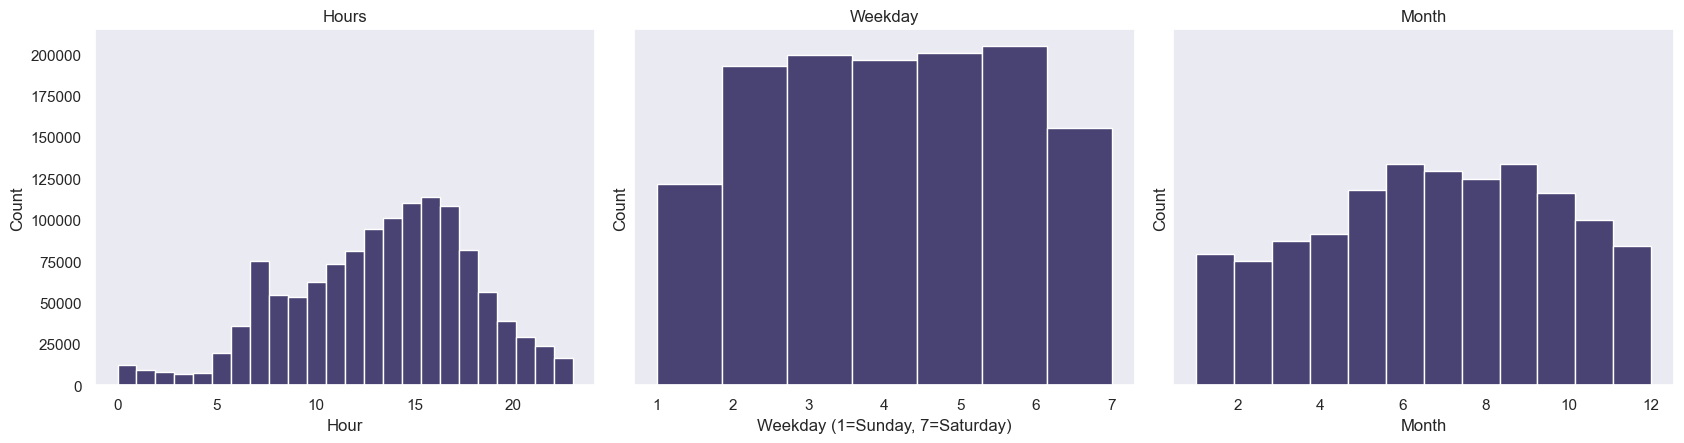

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5), sharey=True)
project_color = "#494373"
sns.set_theme(style="darkgrid")

# Histogram for Hours (USTUNDE)
axes[0].hist(df["USTUNDE"], bins=24, color=project_color)
axes[0].set_title("Hours")
axes[0].set_xlabel("Hour")
axes[0].set_ylabel("Count")

# Histogram for Weekdays (UWOCHENTAG)
axes[1].hist(df["UWOCHENTAG"], bins=7, color=project_color)
axes[1].set_title("Weekday")
axes[1].set_xlabel("Weekday (1=Sunday, 7=Saturday)")
axes[1].set_ylabel("Count")

# Histogram for Months (UMONAT)
axes[2].hist(df["UMONAT"], bins=12, color=project_color)
axes[2].set_title("Month")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Count")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Accident Participant Trends

Taking a closer look at _who_ is involved in the accidents reveals strong seasonal patterns, especially for vulnerable road users.

### Seasonal Spike: Bicycles and Motorbikes

- **Summer Increase:** Both the total count and the relative share of bicycles (`IstRad`) and motorbikes (`IstKrad`) involved in accidents increase significantly during the summer months.
- **Reason:** This is expected, as the number of bicycle and motorbike riders is certainly higher in warmer weather. This group can be identified as the main driver for the increased _overall_ accident frequency seen in the summer.

---

### Inverse Trend: Pedestrians

- **Winter Increase:** A noteworthy observation is that pedestrians (`IstFuss`) show the opposite relationship. The share and absolute number of pedestrian-involved accidents are higher in the winter months.
- **Reason:** This is likely due to pedestrians being less visible during the darker winter days, while the total number of pedestrians on the road is likely similar to the summer months.


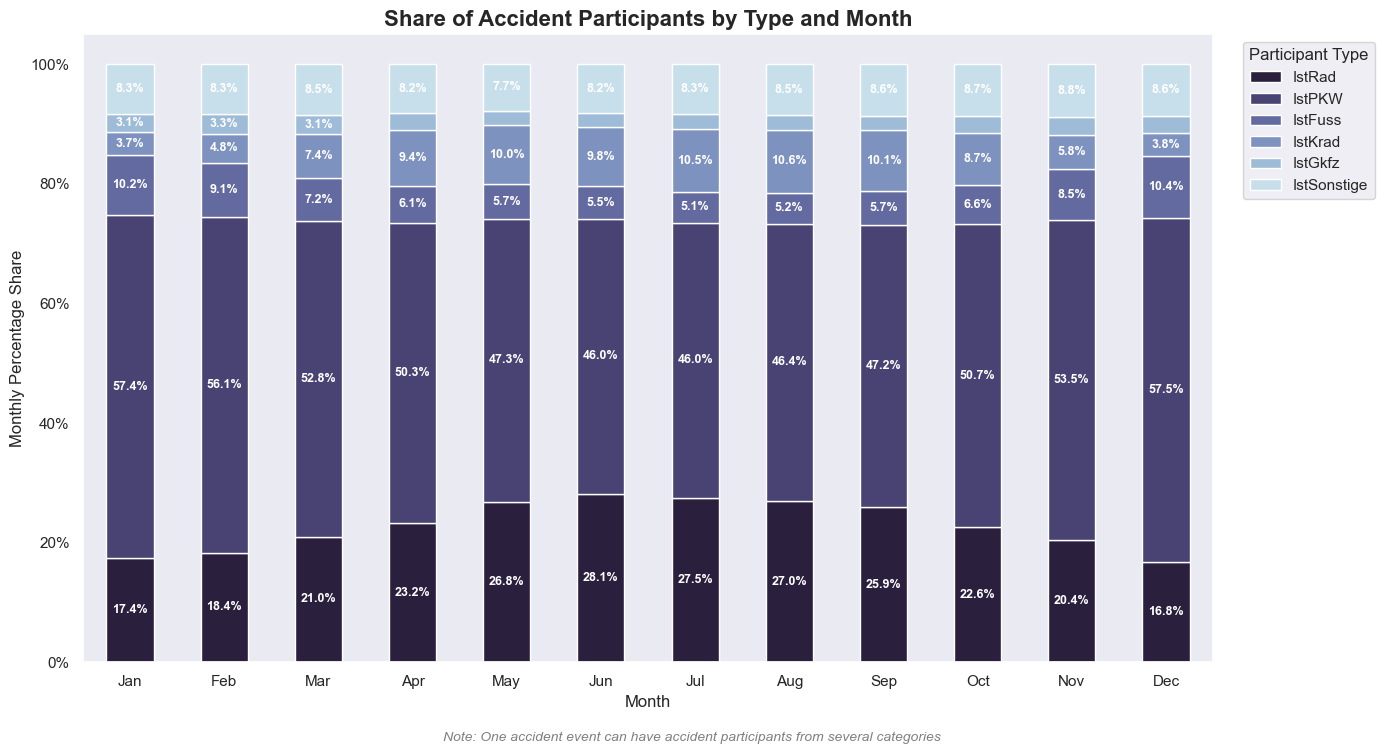

In [92]:
import matplotlib.ticker as mtick  # Import ticker for formatting

accident_types = ["IstRad", "IstPKW", "IstFuss", "IstKrad", "IstGkfz", "IstSonstige"]

# Group by 'UMONAT' (Month) and sum the occurrences of each type
monthly_accident_counts = df_merged.groupby("UMONAT")[accident_types].sum()
month_map = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec",
}

# Ensure all 12 months are present and in order
monthly_accident_counts = monthly_accident_counts.reindex(range(1, 13))
# Rename the index (1, 2, 3...) to the month names ('Jan', 'Feb', 'Mar'...)
monthly_accident_counts.index = monthly_accident_counts.index.map(month_map)

# Sum each row (month) to get the total participants for that month
monthly_totals = monthly_accident_counts.sum(axis=1)
# Divide each cell by its row's total to get the percentage
monthly_accident_perc = monthly_accident_counts.div(monthly_totals, axis=0)

#  3. Setup Plot
fig, ax = plt.subplots(figsize=(14, 8))
my_palette = sns.color_palette("ch:s=.25,rot=-.25", 6)

#  4. Plot the PERCENTAGE data
monthly_accident_perc.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=my_palette[::-1],  # Reverses the 'my_palette' list
)

#  5. NEW: Add percentage labels inside the bars
for c in ax.containers:
    # hide labels for segments smaller than 3% to avoid clutter
    labels = [f"{v.get_height():.1%}" if v.get_height() > 0.03 else "" for v in c]

    # Add the labels
    ax.bar_label(
        c,
        labels=labels,
        label_type="center",
        color="white",
        fontsize=9,
        fontweight="bold",
    )

#  6. Customize and Show Plot

# Set titles and labels
ax.set_title(
    "Share of Accident Participants by Type and Month", fontsize=16, fontweight="bold"
)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Monthly Percentage Share", fontsize=12)

#  7. NEW: Format Y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Rotate the x-axis labels so they are horizontal and readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

#  8. NEW: Add annotation text below the chart
plt.figtext(
    0.5,
    0.01,  # Position at horizontal center, near the bottom
    "Note: One accident event can have accident participants from several categories",
    ha="center",
    va="bottom",
    fontsize=10,
    fontstyle="italic",
    color="grey",
)

# Move the legend outside the plot
ax.legend(
    title="Participant Type",
    bbox_to_anchor=(1.02, 1),  # Position legend to the right
    loc="upper left",
)

# Use tight_layout to make sure everything fits
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.grid(False)
plt.show()

# Display the percentage data we plotted
# monthly_accident_perc.head(12)

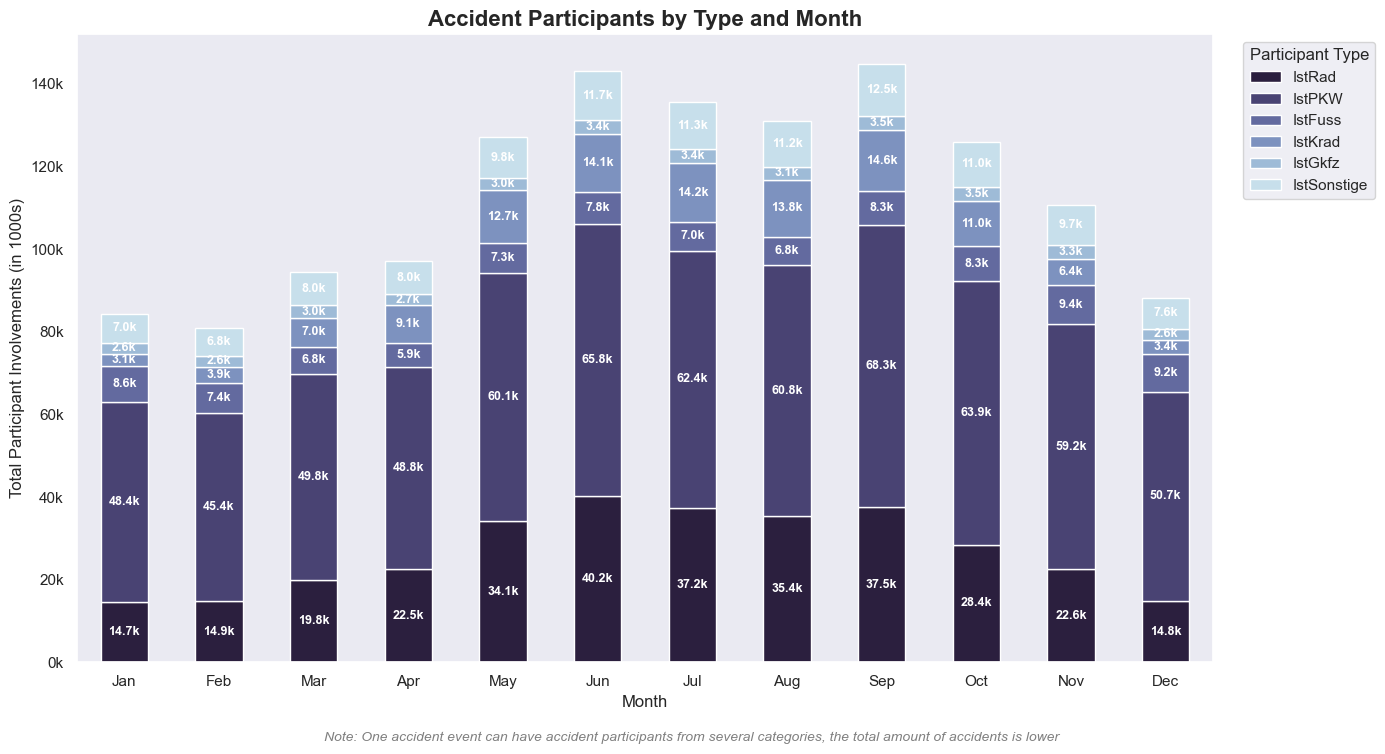

In [93]:
# --- 1. Setup (Same as your code) ---
fig, ax = plt.subplots(figsize=(14, 8))
my_palette = sns.color_palette("ch:s=.25,rot=-.25", 6)

accident_types = ["IstRad", "IstPKW", "IstFuss", "IstKrad", "IstGkfz", "IstSonstige"]

# --- 2. Data Prep (Same as your code) ---
# Group by 'UMONAT' (Month) and sum the occurrences of each type
monthly_accident_counts = df_merged.groupby("UMONAT")[accident_types].sum()
month_map = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec",
}
# Ensure all 12 months are present and in order
monthly_accident_counts = monthly_accident_counts.reindex(range(1, 13))
# Rename the index (1, 2, 3...) to the month names ('Jan', 'Feb', 'Mar'...)
monthly_accident_counts.index = monthly_accident_counts.index.map(month_map)

# --- 3. Plot the ABSOLUTE data ---
monthly_accident_counts.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=my_palette[::-1],  # Reverses the 'my_palette' list
)

# --- 4. NEW: Add labels in 1000s inside the bars ---
for c in ax.containers:
    # Create custom labels formatted in 1000s (e.g., 5400 -> '5.4k')
    # We hide labels for segments smaller than 1000 to avoid clutter
    labels = [
        f"{v.get_height()/1000:.1f}k" if v.get_height() >= 1000 else "" for v in c
    ]

    # Add the labels
    ax.bar_label(
        c,
        labels=labels,
        label_type="center",
        color="white",
        fontsize=9,
        fontweight="bold",
    )

# --- 5. Customize and Show Plot ---

# Set titles and labels
ax.set_title("Accident Participants by Type and Month", fontsize=16, fontweight="bold")
ax.set_xlabel("Month", fontsize=12)
# Updated Y-label to reflect 1000s
ax.set_ylabel("Total Participant Involvements (in 1000s)", fontsize=12)

# --- 6. NEW: Format Y-axis to show 1000s ---
# This formats 50000 as '50k'
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f"{x/1000:,.0f}k"))

# Rotate the x-axis labels so they are horizontal and readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# --- 7. Add annotation text below the chart ---
plt.figtext(
    0.5,
    0.01,  # Position at horizontal center, near the bottom
    "Note: One accident event can have accident participants from several categories, the total amount of accidents is lower",
    ha="center",
    va="bottom",
    fontsize=10,
    fontstyle="italic",
    color="grey",
)

# Move the legend outside the plot
ax.legend(
    title="Participant Type",
    bbox_to_anchor=(1.02, 1),  # Position legend to the right
    loc="upper left",
)

# Use tight_layout to make sure everything fits
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.grid(False)
plt.show()

# Display the original count data
# monthly_accident_counts.head(12)

In [94]:
# 'sq km' and 'population' are removed from here
sum_columns = [
    "inj_light",
    "inj_serious",
    "inj_fatal",
    "inj_total",
    "IstFuss",
    "IstRad",
    "IstKrad",
    "IstPKW",
    "IstGkfz",
    "IstSonstige",
    "daylight",
    "twilight",
    "darkness",
]

# 'sq km' and 'population' are correctly placed here
info_columns = {
    "regional key": "first",
    "ULAND": "first",
    "sq km": "first",
    "population": "first",
}

#  2. Create the new aggregation dictionary
city_agg_methods = {col: "sum" for col in sum_columns}
city_agg_methods.update(info_columns)

#  3. Create the new DataFrame
df_cities_total = df_merged.groupby("city").agg(city_agg_methods).reset_index()

#  4. Sort by total injuries and limit to top 20
df_cities_total = df_cities_total.sort_values(by="inj_total", ascending=False)
df_cities_total = df_cities_total.head(20).copy()  # Use .copy() to avoid warnings


#  5. Add your new columns
df_years_per_city = df_merged.groupby("city")["UJAHR"].nunique().reset_index()
df_years_per_city.columns = ["city", "years_count"]
df_years_per_city.head()

df_cities_total["Accidents_per_1000"] = df_cities_total.apply(
    lambda row: (row["inj_total"] / row["population"])
    * 1000
    / df_years_per_city[df_years_per_city["city"] == row["city"]]["years_count"].values[
        0
    ],
    axis=1,
)

df_cities_total["accidents_per_sqkm"] = df_cities_total.apply(
    lambda row: row["inj_total"]
    / row["sq km"]
    / df_years_per_city[df_years_per_city["city"] == row["city"]]["years_count"].values[
        0
    ],
    axis=1,
)

df_cities_total.head(20)

,city,inj_light,inj_serious,inj_fatal,inj_total,IstFuss,IstRad,IstKrad,IstPKW,IstGkfz,IstSonstige,daylight,twilight,darkness,regional key,ULAND,sq km,population,Accidents_per_1000,accidents_per_sqkm
218,Berlin,51408,8631,185,60224,7936,22984,9107,48051,1728,9556,44772,3423,12029,11000000,11,891.12,3685265,3.268367,13.516474
713,Hamburg,30681,3235,114,34030,4257,13788,3122,23438,1464,6648,25170,1953,6907,02000000,02,755.09,1862565,3.654101,9.013495
1200,München,21693,2234,66,23993,3015,11748,2597,16550,658,3348,18057,1149,4787,09162000,09,310.70,1505005,3.188428,15.444480
954,Köln,15163,2377,67,17607,2157,7406,2007,12133,690,2959,12877,934,3796,05315000,05,405.02,1024621,4.295979,10.867982
720,Hannover,11157,927,37,12121,1241,5652,852,8418,426,1733,8912,739,2470,03241001,03,204.30,522131,4.642896,11.865884
528,Frankfurt am Main,10541,1461,52,12054,1572,3906,1379,9499,522,2375,8631,681,2742,06412000,06,248.31,756021,3.188800,9.708832
415,Dresden,8692,1711,32,10435,1184,5770,909,6755,273,1247,8128,500,1807,14612000,14,328.48,564904,3.694433,6.353507
287,Bremen,8887,1195,41,10123,1286,4340,698,7600,447,1692,7639,591,1893,04011000,04,318.20,586271,3.453352,6.362665
1302,Nürnberg,8047,1174,35,9256,1034,3712,1028,6368,365,1333,7012,428,1816,09564000,09,186.44,529508,3.496076,9.929200
424,Düsseldorf,7844,1202,35,9081,1450,3278,1035,6641,322,1830,6723,478,1880,05111000,05,217.41,618685,3.669476,10.442252


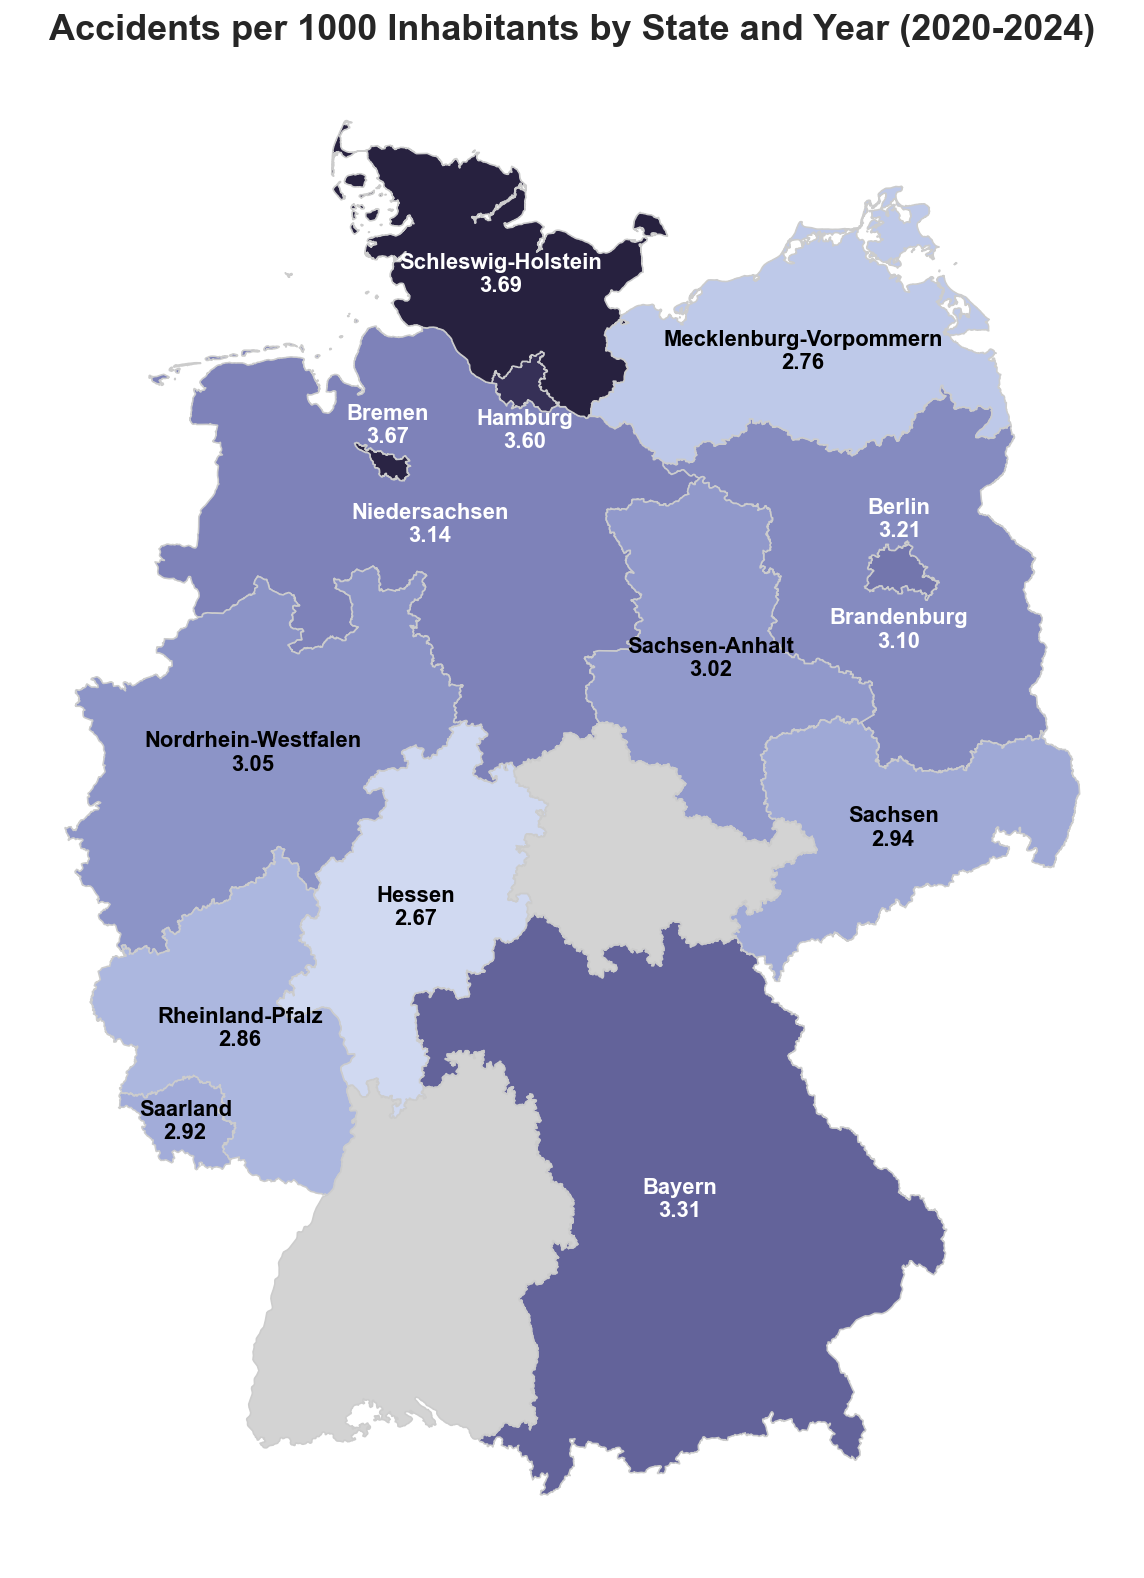

In [95]:
df_counts = df.groupby("ULAND").size().reset_index(name="AccidentCount")
df_accident_per_population = df_States.merge(df_counts, on="ULAND", how="left")
df_accident_per_population["AccidentCount"] = (
    df_accident_per_population["AccidentCount"].fillna(0).astype(int)
)

df_years_per_land = df_merged.groupby("ULAND")["UJAHR"].nunique().reset_index()
df_years_per_land.columns = ["ULAND", "years_count"]
df_years_per_land.head()

df_accident_per_population["AccidentsPer1000"] = df_accident_per_population.apply(
    lambda row: (row["AccidentCount"] / row["INHABITANTS"])
    * 1000
    / df_years_per_land[df_years_per_land["ULAND"] == row["ULAND"]][
        "years_count"
    ].values[0],
    axis=1,
)
# print(df_accident_per_population.sort_values(by='AccidentsPer1000', ascending=False).head(16))

# Step 1: Load the geospatial data for German states
geodata_url = "https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/2_hoch.geo.json"
gdf_germany = gpd.read_file(geodata_url)

# Step 2: Merge data with the geospatial data using state names
# Match the 'name' column from the map data with the 'STATE' column from your data.
merged_gdf = gdf_germany.merge(
    df_accident_per_population, left_on="name", right_on="STATE", how="left"
)

#  5. Create the Map Visualization
fig, ax = plt.subplots(1, 1, figsize=(10, 14), dpi=144)
sns.set_theme(style="dark")
# cmap = sns.color_palette("ch:s=.25,rot=-.25", 16, as_cmap=True)
cmap = sns.color_palette("ch:s=.1,rot=-.1", 16, as_cmap=True)

merged_gdf.plot(
    column="AccidentsPer1000",
    cmap=cmap,
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=False,
    missing_kwds={"color": "lightgrey", "label": "Missing values"},
    legend_kwds={
        "label": "Accidents per 1000 Inhabitants (Normalized)",
        "orientation": "horizontal",
    },
)

## 6. Add Annotations

# 1. Set a dynamic threshold
threshold = merged_gdf["AccidentsPer1000"].median()

# Loop through each state to add text.
for idx, row in merged_gdf.iterrows():
    if pd.isna(row["AccidentsPer1000"]):
        continue

    # 2. Automatically set text color based on the threshold.
    text_color = "white" if row["AccidentsPer1000"] > threshold else "black"

    # Get the default centroid coordinates
    centroid = row.geometry.centroid
    x = centroid.x
    y = centroid.y

    state_name = row["STATE"]
    value = row["AccidentsPer1000"]
    annotation_text = f"{state_name}\n{value:.2f}"

    # START: Label Offset Logic
    if state_name == "Brandenburg":
        y -= 0.3  # Nudge Brandenburg's label DOWN
    elif state_name == "Bremen":
        y += 0.22  # Nudge Saarland's label UP
    elif state_name == "Berlin":
        y += 0.3  # Nudge Berlin's label UP
    elif state_name == "Hamburg":
        y -= 0.25  # Nudge Berlin's label UP
    # END: Label Offset Logic

    ax.annotate(
        text=annotation_text,
        xy=(x, y),  # Use the potentially modified x and y
        ha="center",
        va="center",
        fontsize=11,
        fontweight="bold",
        color=text_color,
    )
# 7. Customize and Show Plot
ax.axis("off")
ax.set_title(
    "Accidents per 1000 Inhabitants by State and Year (2020-2024)",
    fontdict={"fontsize": "18", "fontweight": "bold"},
)
plt.show()

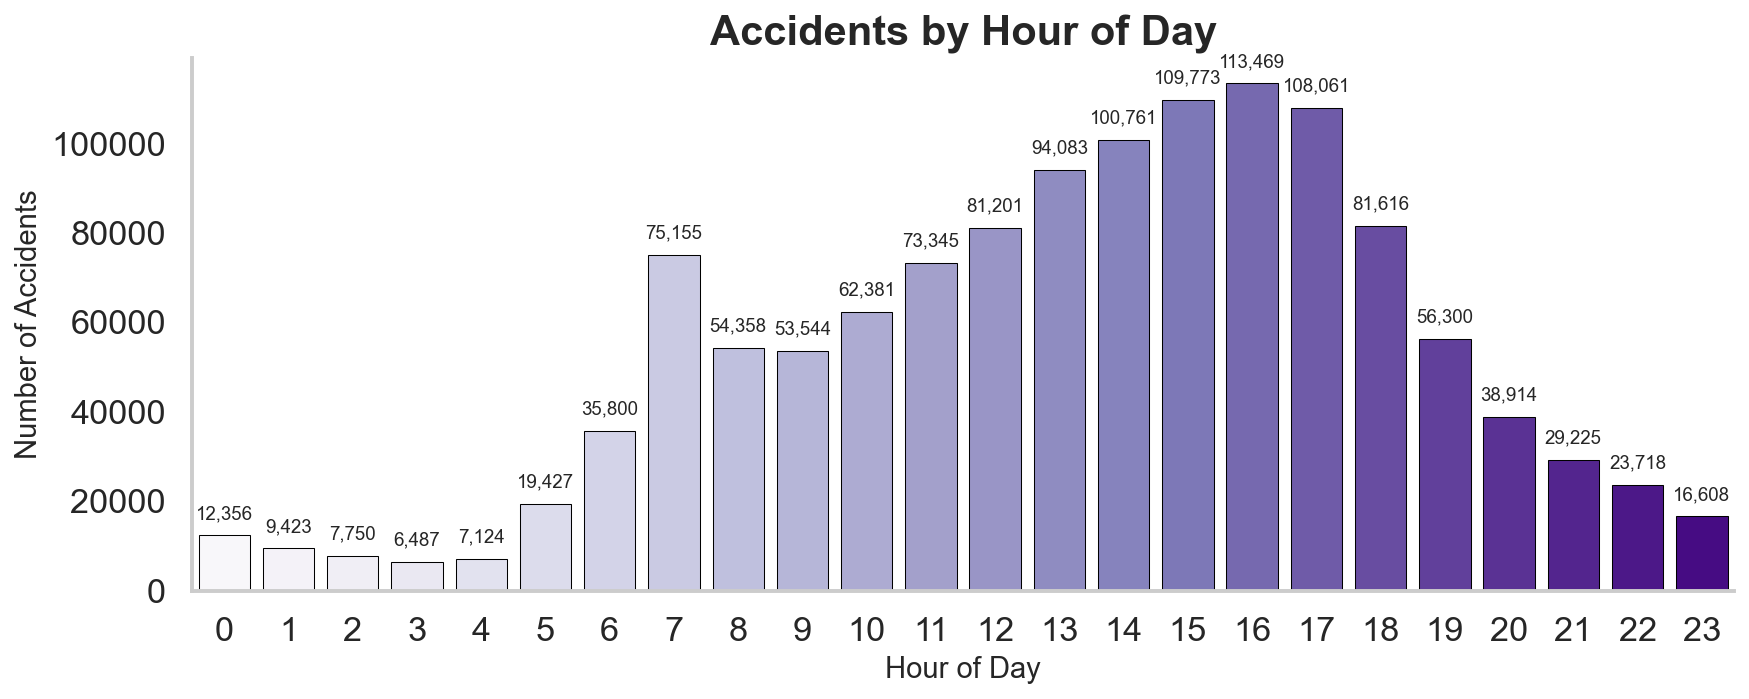

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare counts (discrete hours 0-23)
counts = df['USTUNDE'].value_counts().sort_index()
# Ensure all hours 0-23 present (fill missing with 0)
hours = np.arange(24)
counts = counts.reindex(hours, fill_value=0)

# Styling
sns.set_theme(style="whitegrid")
sns.set_context("talk")   # larger fonts for presentations
fig, ax = plt.subplots(figsize=(12, 5), dpi=150)

# Color gradient palette across 24 bars
palette = sns.color_palette("Purples", n_colors=24)
bars = ax.bar(hours, counts.values, color=palette, edgecolor='black', linewidth=0.5)

# Titles & labels
ax.set_title('Accidents by Hour of Day', fontsize=20, fontweight='bold')
ax.set_xlabel('Hour of Day', fontsize=14)
ax.set_ylabel('Number of Accidents', fontsize=14)

# Ticks and limits
ax.set_xticks(hours)
ax.set_xlim(-0.5, 23.5)

# Grid & spines
ax.grid(False)
sns.despine(ax=ax, left=False, right=True, top=True)

# Annotate counts above bars (optional — only annotate if not too dense)
for rect in bars:
    h = int(rect.get_height())
    if h:
        ax.annotate(f'{h:,}', xy=(rect.get_x() + rect.get_width() / 2, h),
                    xytext=(0, 6), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)



plt.tight_layout()
plt.show()

Looking at the Accidents per 1000 Inhabitants by City and Year for the Top 20 cities by population in Germany, we find Lübeck, a smaller city northeast of Hamburg has the highest number of Accidents per 1000 Inhabitants at 4.8. Dortmund, Essen, and Duisburg, three cities close to each other in the state of Nordrhein-Westphalia show the lowest accidents per 1000 Inhabitants in our timeframe (2020-2024)


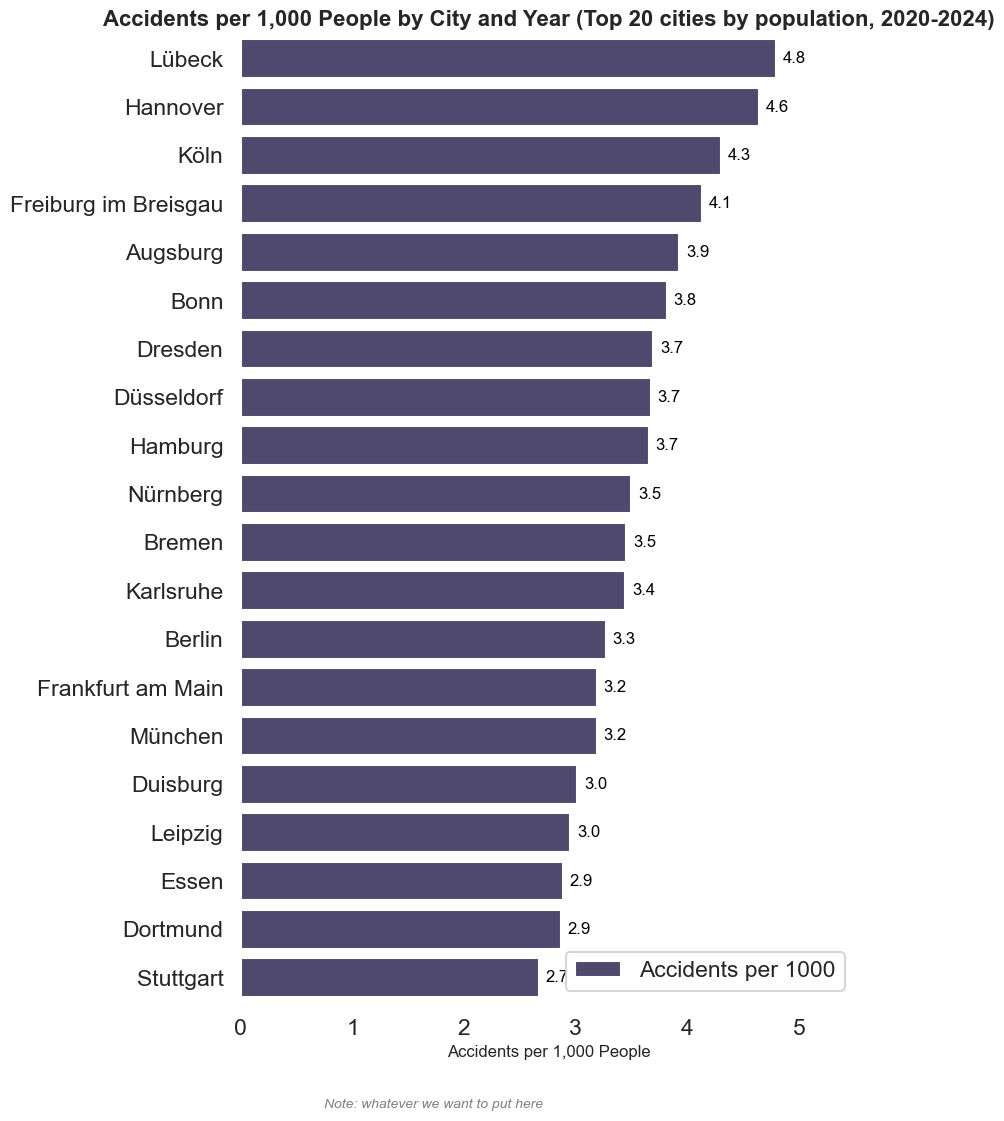

In [97]:
f, ax = plt.subplots(figsize=(9, 12))
project_color = "#494373"

# Sort the DataFrame and assign it back to the variable
df_cities_total = df_cities_total.sort_values("Accidents_per_1000", ascending=False)

# Plot the total crashes
sns.barplot(
    x="Accidents_per_1000",
    y="city",
    data=df_cities_total,
    label="Accidents per 1000",
    color=project_color,
)

# This adds the value label (e.g., '25.3') to the end of each bar
ax.bar_label(
    ax.containers[0],
    fmt="%.1f",  # Format to one decimal place
    padding=5,  # Add some space after the bar
    fontsize=12,
    color="black",
)


# Set titles and labels
ax.set_title(
    "Accidents per 1,000 People by City and Year (Top 20 cities by population, 2020-2024)",
    fontsize=16,
    fontweight="bold",
)
ax.set_xlabel("Accidents per 1,000 People", fontsize=12)
ax.set_ylabel("")  # Keep y-label empty as it's self-explanatory

max_val = df_cities_total["Accidents_per_1000"].max()
ax.set(xlim=(0, max_val * 1.15))


plt.figtext(
    0.5,
    0.01,  # Position at horizontal center, near the bottom
    "Note: whatever we want to put here",
    ha="center",
    va="bottom",
    fontsize=10,
    fontstyle="italic",
    color="grey",
)

# Move the legend
ax.legend(
    # title='Metric',
    loc="lower right",
    frameon=True,
)

sns.despine(left=True, bottom=True)
# Use tight_layout to make sure everything fits, rect makes room for annotation
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.grid(False)
plt.show()

Schleswig-Holstein is the state with the highest Accidents per 1000 inhabitant at 3.69 per year across 2020-2024. This is 1.58x higher than in Thüringen, the state with the lowest accidents per 1000 inhabitant (2.33)


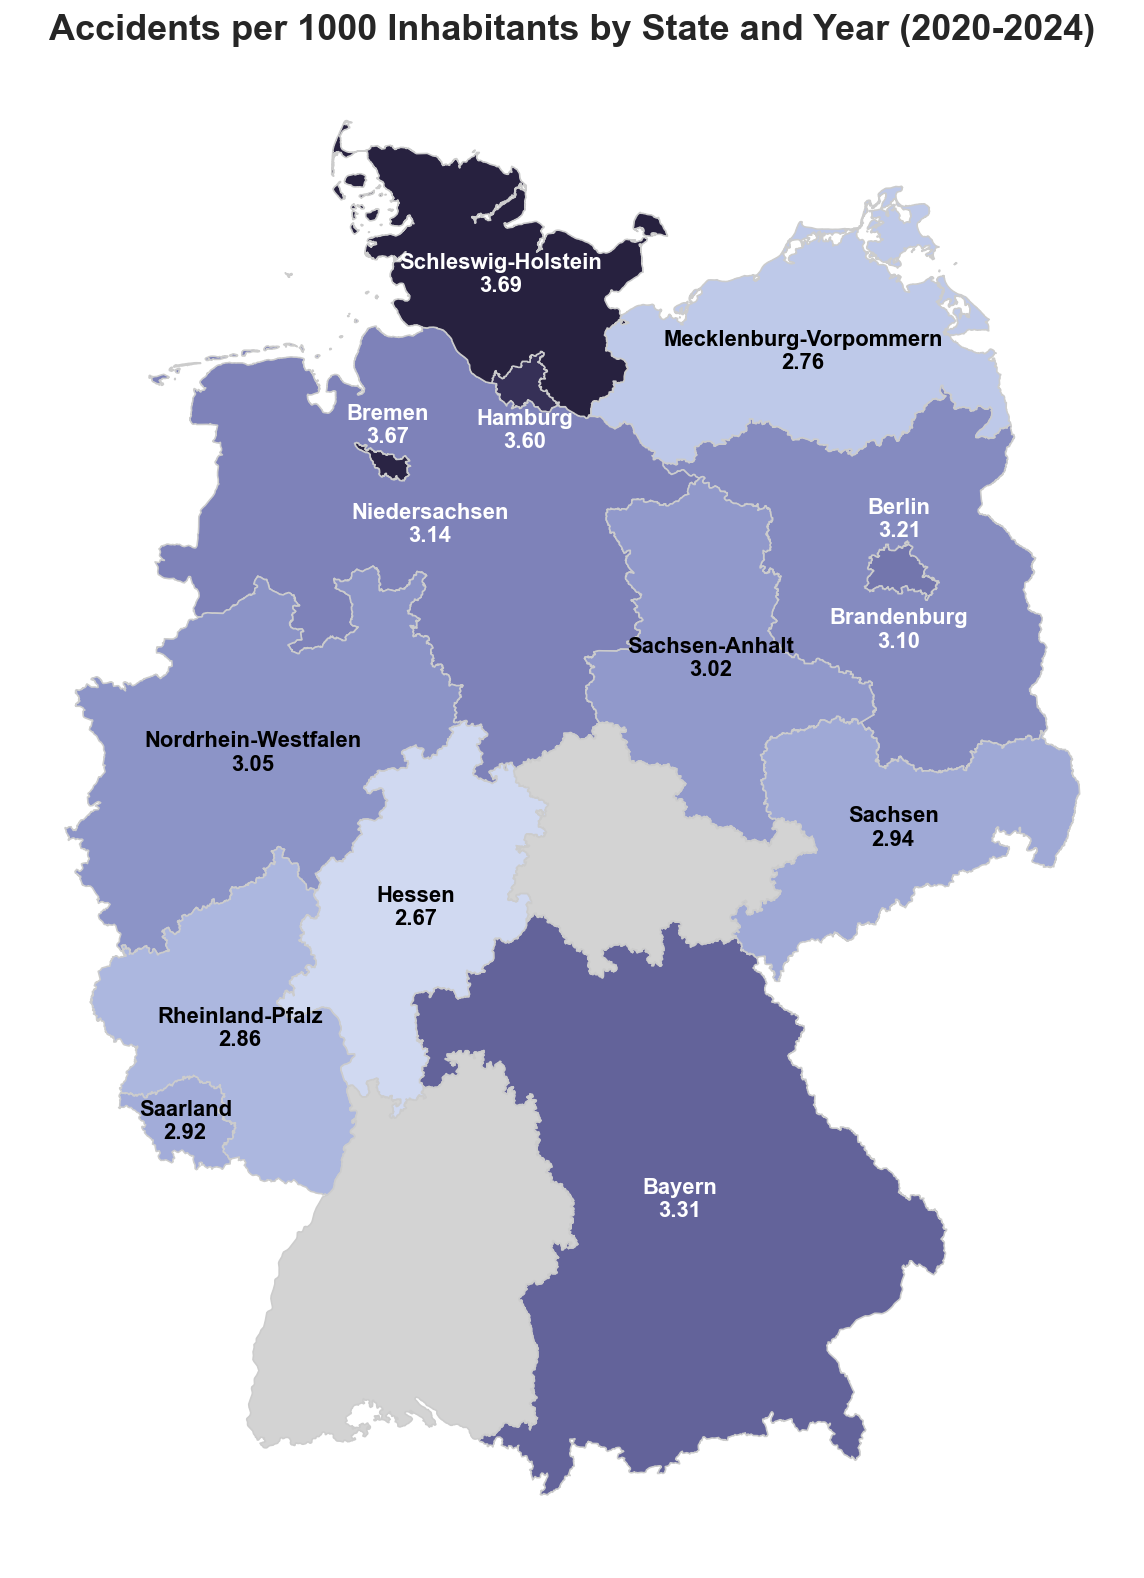

In [99]:
df_counts = df.groupby("ULAND").size().reset_index(name="AccidentCount")
df_accident_per_population = df_States.merge(df_counts, on="ULAND", how="left")
df_accident_per_population["AccidentCount"] = (
    df_accident_per_population["AccidentCount"].fillna(0).astype(int)
)

df_years_per_land = df_merged.groupby("ULAND")["UJAHR"].nunique().reset_index()
df_years_per_land.columns = ["ULAND", "years_count"]
df_years_per_land.head()

df_accident_per_population["AccidentsPer1000"] = df_accident_per_population.apply(
    lambda row: (row["AccidentCount"] / row["INHABITANTS"])
    * 1000
    / df_years_per_land[df_years_per_land["ULAND"] == row["ULAND"]][
        "years_count"
    ].values[0],
    axis=1,
)
# print(df_accident_per_population.sort_values(by='AccidentsPer1000', ascending=False).head(16))

# Step 1: Load the geospatial data for German states
geodata_url = "https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/2_hoch.geo.json"
gdf_germany = gpd.read_file(geodata_url)

# Step 2: Merge data with the geospatial data using state names
# Match the 'name' column from the map data with the 'STATE' column from your data.
merged_gdf = gdf_germany.merge(
    df_accident_per_population, left_on="name", right_on="STATE", how="left"
)

#  5. Create the Map Visualization
fig, ax = plt.subplots(1, 1, figsize=(10, 14), dpi=144)
sns.set_theme(style="dark")
# cmap = sns.color_palette("ch:s=.25,rot=-.25", 16, as_cmap=True)
cmap = sns.color_palette("ch:s=.1,rot=-.1", 16, as_cmap=True)

merged_gdf.plot(
    column="AccidentsPer1000",
    cmap=cmap,
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=False,
    missing_kwds={"color": "lightgrey", "label": "Missing values"},
    legend_kwds={
        "label": "Accidents per 1000 Inhabitants (Normalized)",
        "orientation": "horizontal",
    },
)

## 6. Add Annotations

# 1. Set a dynamic threshold
threshold = merged_gdf["AccidentsPer1000"].median()

# Loop through each state to add text.
for idx, row in merged_gdf.iterrows():
    if pd.isna(row["AccidentsPer1000"]):
        continue

    # 2. Automatically set text color based on the threshold.
    text_color = "white" if row["AccidentsPer1000"] > threshold else "black"

    # Get the default centroid coordinates
    centroid = row.geometry.centroid
    x = centroid.x
    y = centroid.y

    state_name = row["STATE"]
    value = row["AccidentsPer1000"]
    annotation_text = f"{state_name}\n{value:.2f}"

    # START: Label Offset Logic
    if state_name == "Brandenburg":
        y -= 0.3  # Nudge Brandenburg's label DOWN
    elif state_name == "Bremen":
        y += 0.22  # Nudge Saarland's label UP
    elif state_name == "Berlin":
        y += 0.3  # Nudge Berlin's label UP
    elif state_name == "Hamburg":
        y -= 0.25  # Nudge Berlin's label UP
    # END: Label Offset Logic

    ax.annotate(
        text=annotation_text,
        xy=(x, y),  # Use the potentially modified x and y
        ha="center",
        va="center",
        fontsize=11,
        fontweight="bold",
        color=text_color,
    )
# 7. Customize and Show Plot
ax.axis("off")
ax.set_title(
    "Accidents per 1000 Inhabitants by State and Year (2020-2024)",
    fontdict={"fontsize": "18", "fontweight": "bold"},
)
plt.show()

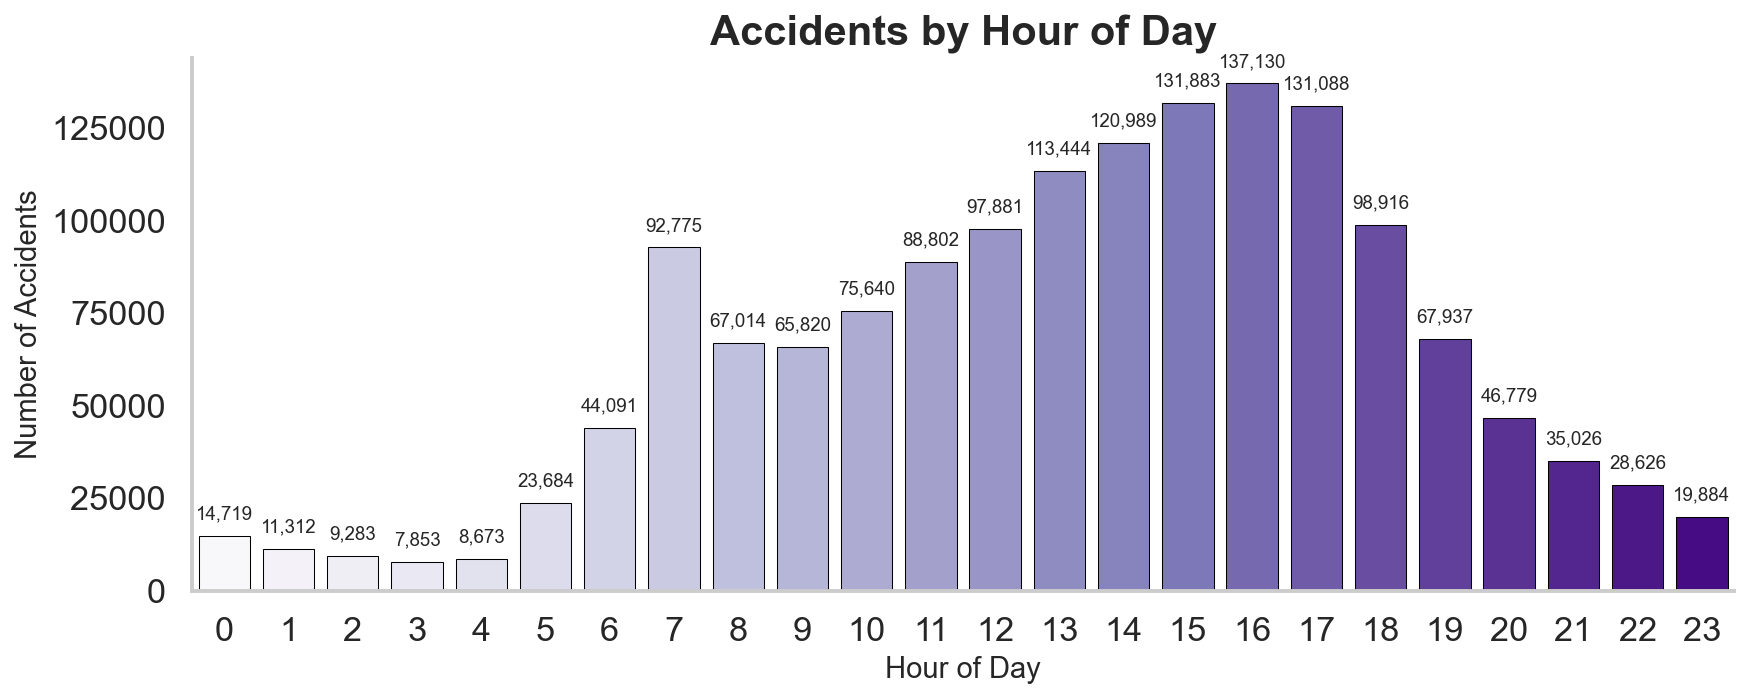

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare counts (discrete hours 0-23)
counts = df['USTUNDE'].value_counts().sort_index()
# Ensure all hours 0-23 present (fill missing with 0)
hours = np.arange(24)
counts = counts.reindex(hours, fill_value=0)

# Styling
sns.set_theme(style="whitegrid")
sns.set_context("talk")   # larger fonts for presentations
fig, ax = plt.subplots(figsize=(12, 5), dpi=150)

# Color gradient palette across 24 bars
palette = sns.color_palette("Purples", n_colors=24)
bars = ax.bar(hours, counts.values, color=palette, edgecolor='black', linewidth=0.5)

# Titles & labels
ax.set_title('Accidents by Hour of Day', fontsize=20, fontweight='bold')
ax.set_xlabel('Hour of Day', fontsize=14)
ax.set_ylabel('Number of Accidents', fontsize=14)

# Ticks and limits
ax.set_xticks(hours)
ax.set_xlim(-0.5, 23.5)

# Grid & spines
ax.grid(False)
sns.despine(ax=ax, left=False, right=True, top=True)

# Annotate counts above bars (optional — only annotate if not too dense)
for rect in bars:
    h = int(rect.get_height())
    if h:
        ax.annotate(f'{h:,}', xy=(rect.get_x() + rect.get_width() / 2, h),
                    xytext=(0, 6), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)



plt.tight_layout()
plt.show()

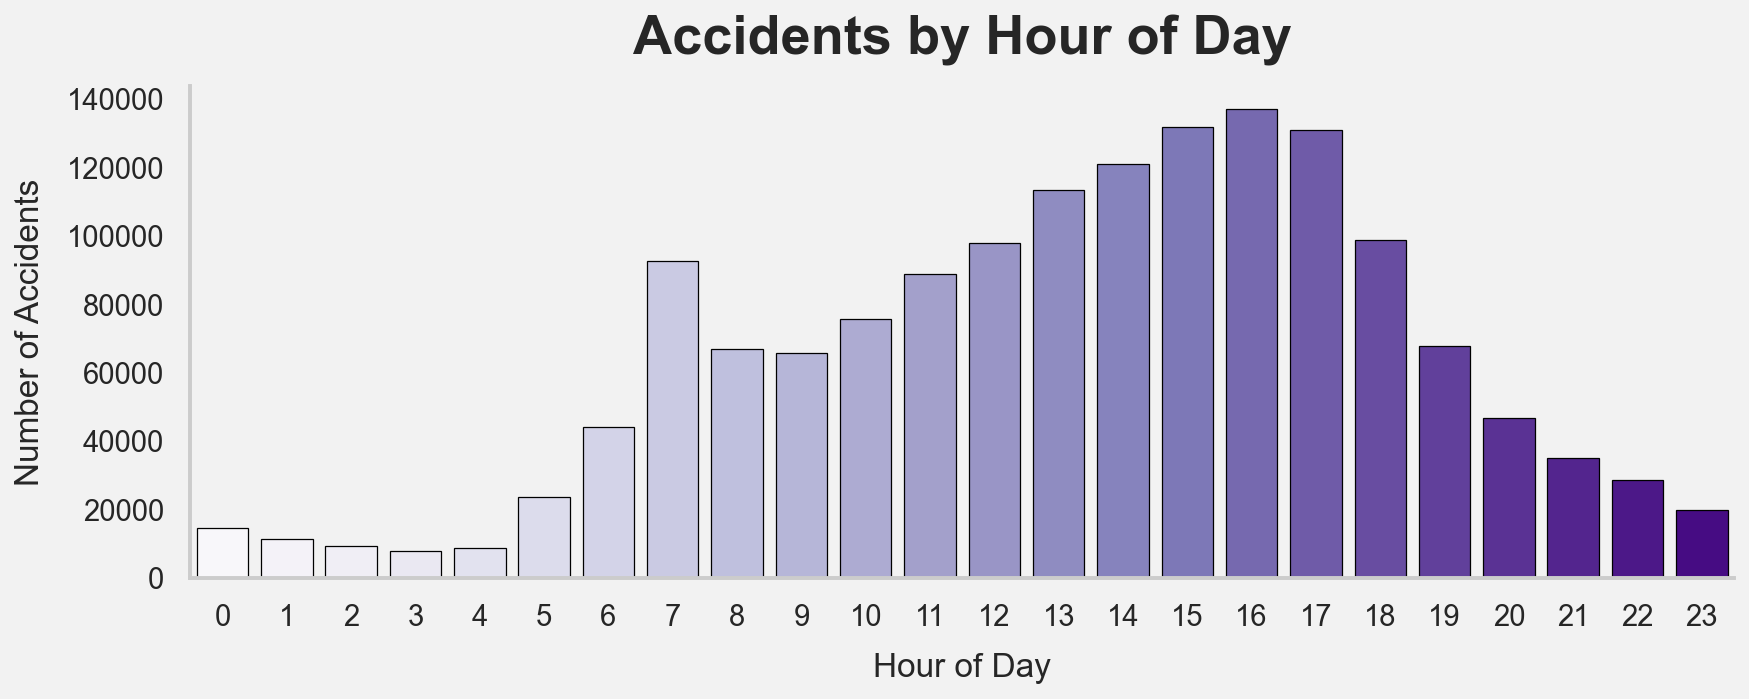

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Prepare counts (discrete hours 0–23) ---
counts = df['USTUNDE'].value_counts().sort_index()
hours = np.arange(24)
counts = counts.reindex(hours, fill_value=0)

# --- Plot styling ---
sns.set_theme(style="whitegrid")
sns.set_context("talk")  # larger fonts for presentation

fig, ax = plt.subplots(figsize=(12, 5), dpi=150)

# --- Grey background ---
ax.set_facecolor("#f2f2f2")  # light grey
fig.patch.set_facecolor("#f2f2f2")  # match figure background

# Color gradient palette across 24 bars
palette = sns.color_palette("Purples", n_colors=24)
ax.bar(hours, counts.values, color=palette, edgecolor='black', linewidth=0.6)

# --- Titles & labels ---
ax.set_title('Accidents by Hour of Day', fontsize=26, fontweight='bold', pad=15)
ax.set_xlabel('Hour of Day', fontsize=16, labelpad=10)
ax.set_ylabel('Number of Accidents', fontsize=16, labelpad=10)

# --- Ticks ---
ax.set_xticks(hours)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlim(-0.5, 23.5)

# --- Grid & spines ---
ax.grid(False)
sns.despine(ax=ax, left=False, right=True, top=True)

plt.tight_layout()
plt.show()

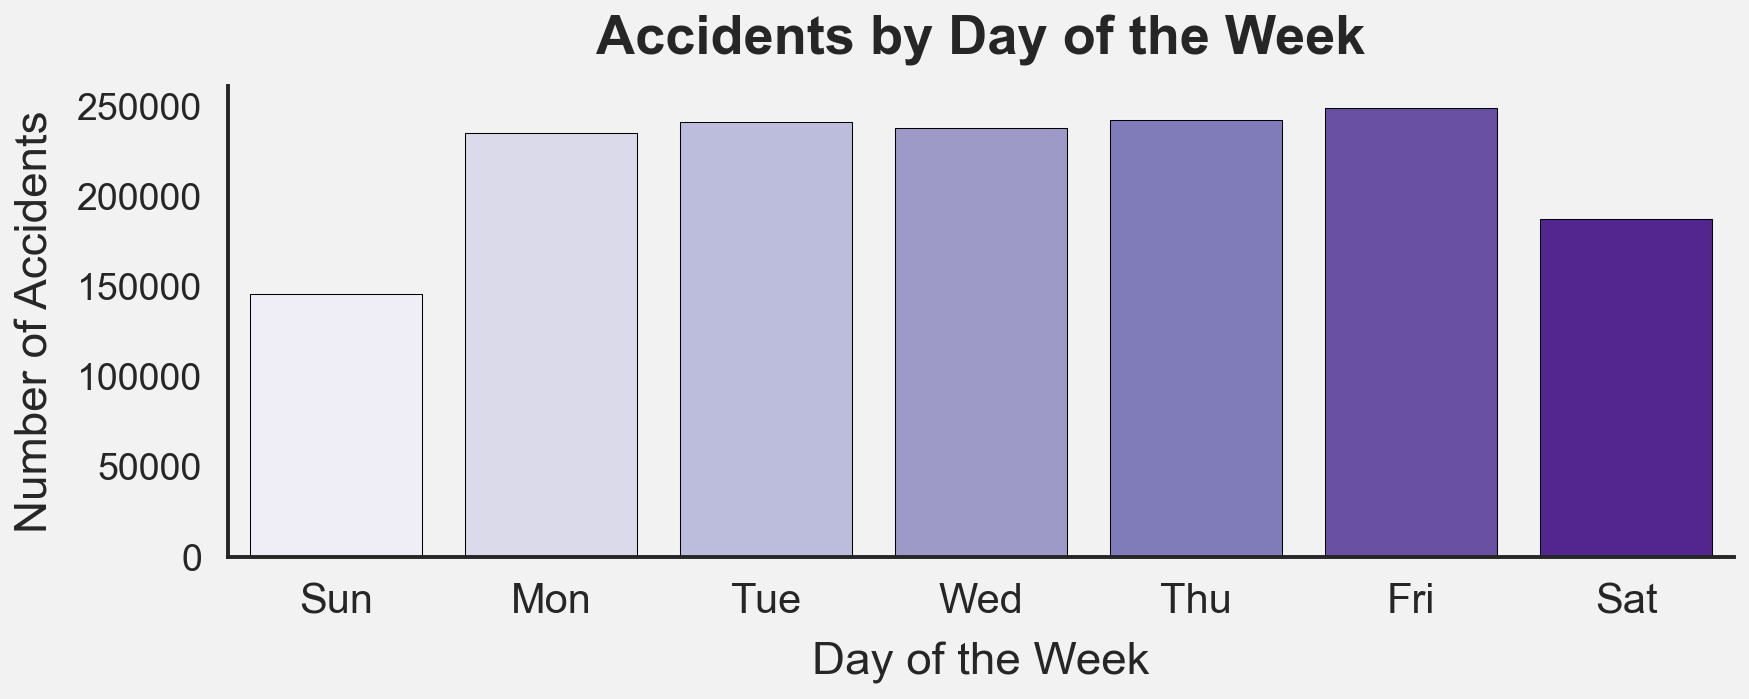

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Prepare counts (discrete weekdays 1–7) ---
counts = df['UWOCHENTAG'].value_counts().sort_index()

# Ensure all weekdays 1–7 are present
days = np.arange(1, 8)
counts = counts.reindex(days, fill_value=0)

# Weekday labels (assuming Monday=1)
day_labels = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# --- Styling ---
sns.set_theme(style="white")     # clean background, no grid
sns.set_context("talk")          # larger fonts for presentation
fig, ax = plt.subplots(figsize=(12, 5), dpi=150)

# --- Grey background ---
ax.set_facecolor("#f2f2f2")  # light grey
fig.patch.set_facecolor("#f2f2f2")  # match figure background

# Color gradient palette across 7 bars
palette = sns.color_palette("Purples", n_colors=7)
ax.bar(days, counts.values, color=palette, edgecolor='black', linewidth=0.5)

# --- Titles & labels ---
ax.set_title('Accidents by Day of the Week', fontsize=26, fontweight='bold', pad=15)
ax.set_xlabel('Day of the Week', fontsize=22, labelpad=10)
ax.set_ylabel('Number of Accidents', fontsize=22, labelpad=10)

# --- X-axis ticks and limits ---
ax.set_xticks(days)
ax.set_xticklabels(day_labels)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=18)
ax.set_xlim(0.5, 7.5)

# --- Grid & spines ---
ax.grid(False)
sns.despine(ax=ax, left=False, right=True, top=True)

plt.tight_layout()
plt.show()

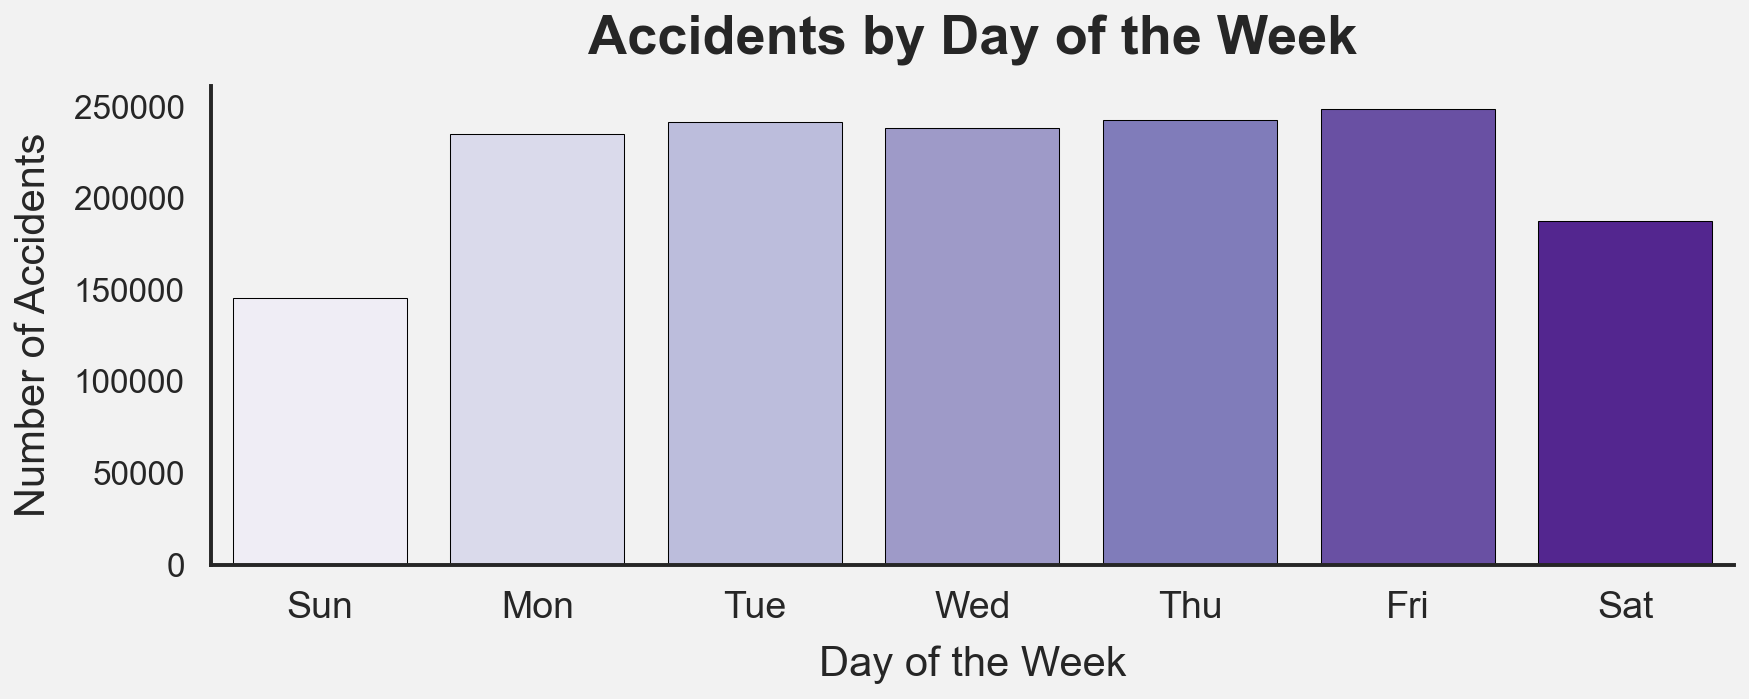

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Prepare counts (discrete weekdays 1–7) ---
counts = df['UWOCHENTAG'].value_counts().sort_index()

# Ensure all weekdays 1–7 are present
days = np.arange(1, 8)
counts = counts.reindex(days, fill_value=0)

# Weekday labels (assuming Monday=1)
day_labels = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# --- Styling ---
sns.set_theme(style="white")     # clean theme (no grid)
sns.set_context("talk")          # larger fonts for presentation
fig, ax = plt.subplots(figsize=(12, 5), dpi=150)

# --- Consistent grey background ---
grey_bg = "#f2f2f2"  # slightly darker than f2f2f2, for more contrast
ax.set_facecolor(grey_bg)       # plot background
fig.patch.set_facecolor(grey_bg)  # figure background

# --- Bars ---
palette = sns.color_palette("Purples", n_colors=7)
ax.bar(days, counts.values, color=palette, edgecolor='black', linewidth=0.5)

# --- Titles & labels ---
ax.set_title('Accidents by Day of the Week', fontsize=26, fontweight='bold', pad=15)
ax.set_xlabel('Day of the Week', fontsize=20, labelpad=10)
ax.set_ylabel('Number of Accidents', fontsize=20, labelpad=10)

# --- Ticks ---
ax.set_xticks(days)
ax.set_xticklabels(day_labels)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=16)
ax.set_xlim(0.5, 7.5)

# --- Grid & spines ---
ax.grid(False)
sns.despine(ax=ax, left=False, right=True, top=True)

plt.tight_layout()
plt.show()

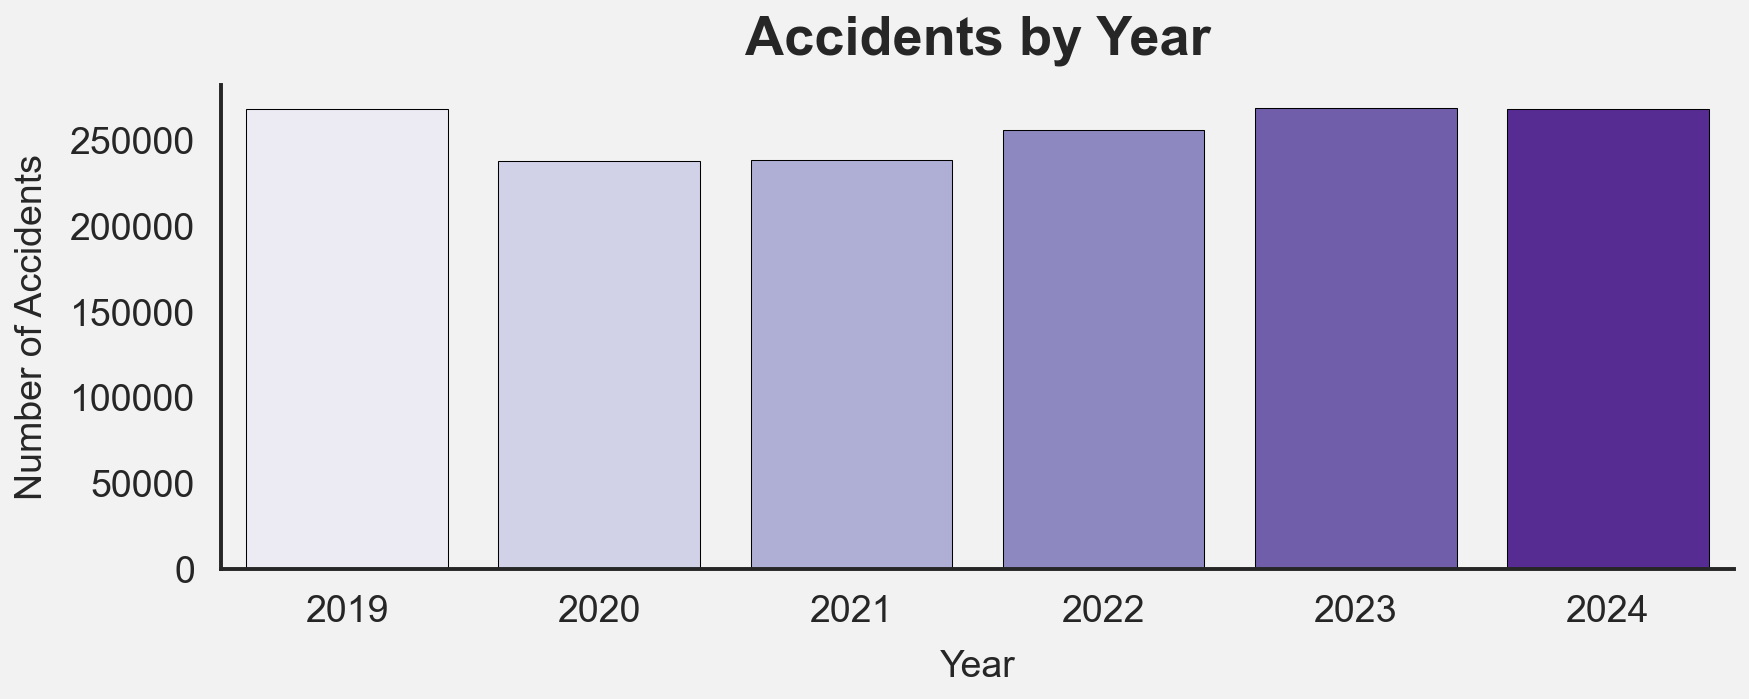

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Prepare counts (discrete years) ---
counts = df['UJAHR'].value_counts().sort_index()

# Ensure sorted order
years = counts.index
counts = counts.reindex(years, fill_value=0)

# --- Styling ---
sns.set_theme(style="white")     # clean look, no grid
sns.set_context("talk")          # larger fonts for presentations
fig, ax = plt.subplots(figsize=(12, 5), dpi=150)

# --- Light grey background ---
grey_bg = "#f2f2f2"
ax.set_facecolor(grey_bg)        # axes (plot) background
fig.patch.set_facecolor(grey_bg) # figure background

# --- Bars ---
palette = sns.color_palette("Purples", n_colors=len(years))
ax.bar(years, counts.values, color=palette, edgecolor='black', linewidth=0.5)

# --- Titles & labels ---
ax.set_title('Accidents by Year', fontsize=26, fontweight='bold', pad=15)
ax.set_xlabel('Year', fontsize=18, labelpad=10)
ax.set_ylabel('Number of Accidents', fontsize=18, labelpad=10)

# --- X-axis ticks and limits ---
ax.set_xticks(years)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_xlim(years.min() - 0.5, years.max() + 0.5)

# --- Grid & spines ---
ax.grid(False)
sns.despine(ax=ax, left=False, right=True, top=True)

# --- Remove annotations for a cleaner presentation (optional) ---
# Commented out; uncomment if you want labels back
# for rect in bars:
#     h = int(rect.get_height())
#     if h:
#         ax.annotate(f'{h:,}', xy=(rect.get_x() + rect.get_width() / 2, h),
#                     xytext=(0, 6), textcoords="offset points",
#                     ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

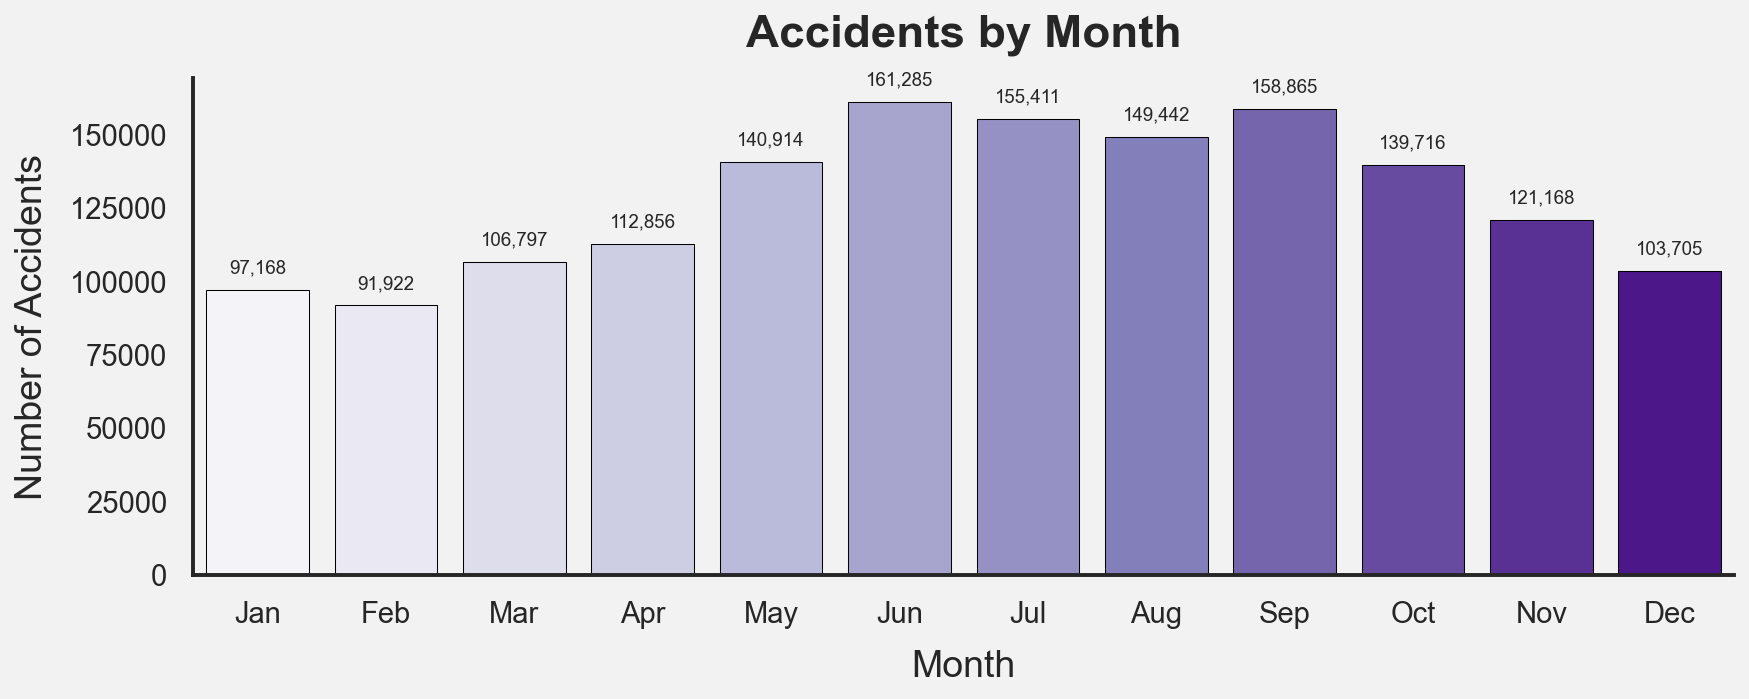

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Prepare counts (discrete months 1–12) ---
counts = df['UMONAT'].value_counts().sort_index()

# Ensure all months 1–12 are present
months = np.arange(1, 13)
counts = counts.reindex(months, fill_value=0)

# Month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# --- Styling ---
sns.set_theme(style="white")     # clean look, no grid
sns.set_context("talk")          # larger fonts for presentation
fig, ax = plt.subplots(figsize=(12, 5), dpi=150)

# --- Light grey background ---
grey_bg = "#f2f2f2"
ax.set_facecolor(grey_bg)        # plot area
fig.patch.set_facecolor(grey_bg) # overall figure background

# --- Bars ---
palette = sns.color_palette("Purples", n_colors=12)
bars = ax.bar(months, counts.values, color=palette, edgecolor='black', linewidth=0.5)

# --- Titles & labels ---
ax.set_title('Accidents by Month', fontsize=22, fontweight='bold', pad=15)
ax.set_xlabel('Month', fontsize=18, labelpad=10)
ax.set_ylabel('Number of Accidents', fontsize=18, labelpad=10)

# --- X-axis ticks and limits ---
ax.set_xticks(months)
ax.set_xticklabels(month_labels)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlim(0.5, 12.5)

# --- Grid & spines ---
ax.grid(False)
sns.despine(ax=ax, left=False, right=True, top=True)

# --- Optional: Remove labels for a cleaner slide look ---
# Comment out the next block if you prefer no numbers above bars
for rect in bars:
    h = int(rect.get_height())
    if h:
        ax.annotate(f'{h:,}', xy=(rect.get_x() + rect.get_width() / 2, h),
                    xytext=(0, 6), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

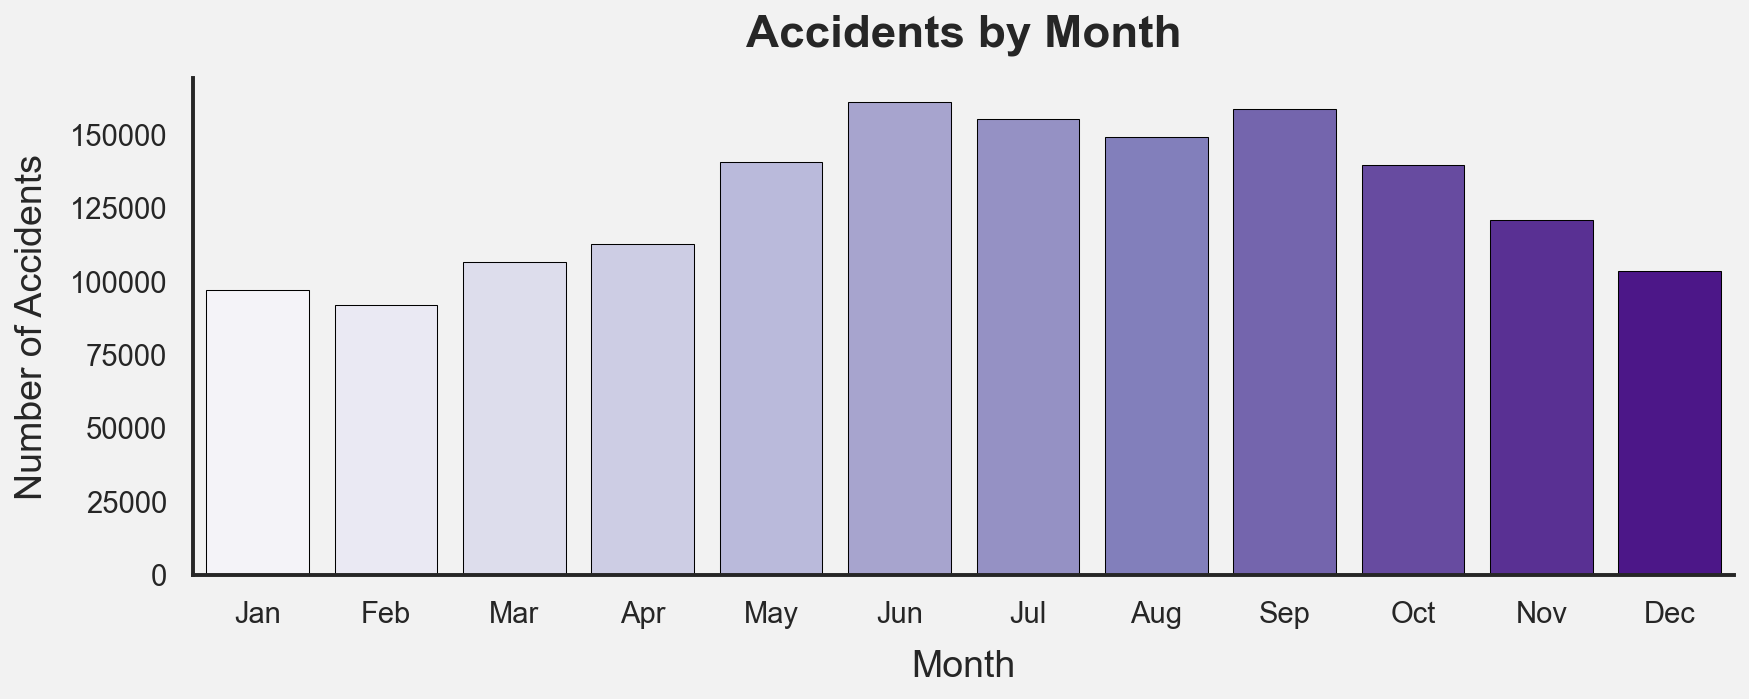

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Prepare counts (discrete months 1–12) ---
counts = df['UMONAT'].value_counts().sort_index()

# Ensure all months 1–12 are present
months = np.arange(1, 13)
counts = counts.reindex(months, fill_value=0)

# Month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# --- Styling ---
sns.set_theme(style="white")     # clean look, no grid
sns.set_context("talk")          # larger fonts for presentation
fig, ax = plt.subplots(figsize=(12, 5), dpi=150)

# --- Light grey background ---
grey_bg = "#f2f2f2"
ax.set_facecolor(grey_bg)        # plot area background
fig.patch.set_facecolor(grey_bg) # overall figure background

# --- Bars ---
palette = sns.color_palette("Purples", n_colors=12)
ax.bar(months, counts.values, color=palette, edgecolor='black', linewidth=0.5)

# --- Titles & labels ---
ax.set_title('Accidents by Month', fontsize=22, fontweight='bold', pad=15)
ax.set_xlabel('Month', fontsize=18, labelpad=10)
ax.set_ylabel('Number of Accidents', fontsize=18, labelpad=10)

# --- X-axis ticks and limits ---
ax.set_xticks(months)
ax.set_xticklabels(month_labels)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlim(0.5, 12.5)

# --- Grid & spines ---
ax.grid(False)
sns.despine(ax=ax, left=False, right=True, top=True)

plt.tight_layout()
plt.show()